# Netflix Data Analysis
## Author: Phillip Liu

Data Source: https://www.kaggle.com/shivamb/netflix-shows

This is a personal project to practice and demonstrate data analysis and visualization skills using Python.

Questions I want answered:

* What is the trend of number of movies over time versus number of tv shows over time?
    
* When did the most movies and most tv shows get added?
    
* What is the distribution of countries over time?
    
* Who has directed the most movies?
    
* Who has directed the most tv shows?
    
* What category of tv shows and movies are most prominent?

In [125]:
# Importing data analysis and visualization libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [126]:
# Importing csv file as df

netflixdf = pd.read_csv('netflix_titles.csv')

# Viewing df information
netflixdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [127]:
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [128]:
netflixdf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Data Cleaning/Preparation

In [129]:
# Renaming columns
netflixdf = netflixdf.rename(columns={
    "show_id": "Show id",
    "type": "Type",
    "title": "Title",
    "director": "Director",
    "cast": "Cast",
    "country": "Country",
    "date_added": "Date added",
    "release year": "Release year",
    "rating": "Guidance rating",
    "duration": "Duration",
    "listed_in": "Genres",
    "description": "Description"
})

# Removing all rows that contain NaN values in certain columns
netflixdf = netflixdf[netflixdf['Cast'].notna()]
netflixdf = netflixdf[netflixdf['Country'].notna()]

# Changing show_id column to not contain the "s" and converting the Series to integer values
netflixdf['Show id'] = netflixdf['Show id'].apply(lambda show_id: show_id.split('s')[1])

# Converting date column to date type
netflixdf['Date added'] = pd.to_datetime(netflixdf['Date added'])

# Converting cast column to a list of values
netflixdf['Cast'] = netflixdf['Cast'].apply(lambda x: x.split(', '))

# Creating new column for date_added year value and convert it from float to int
netflixdf['Date added(Year)'] = netflixdf['Date added'].apply(
    lambda date: date.year
)

# Removing NaN values from date_added_year column
netflixdf = netflixdf[netflixdf['Date added(Year)'].notna()]

netflixdf = netflixdf.astype({'Date added(Year)': int})

### Analysis

In [130]:
# Creating a dictionary of (actor/actress: number of appearances) key value pairs

cast_dict = {}

for cast in netflixdf['Cast']:
    for person in cast:
        if person in cast_dict:
            cast_dict[person] += 1
        else:
            cast_dict[person] = 1

In [131]:
# Finding out who has the most appearances
mostappeared = max(cast_dict, key=cast_dict.get)

In [132]:
print(f"{mostappeared} has been in the most Netflix films/movies with {cast_dict[mostappeared]} appearances.")

Anupam Kher has been in the most Netflix films/movies with 42 appearances.


In [133]:
# Another way to show the 5 cast members with most appearances in order
top_5_most_appeared = sorted(cast_dict, key=cast_dict.get, reverse=True)[:5]

for i in range(len(top_5_most_appeared)):
    print(f"{i+1}: {top_5_most_appeared[i]} with {cast_dict[top_5_most_appeared[i]]} apperances.")

1: Anupam Kher with 42 apperances.
2: Shah Rukh Khan with 34 apperances.
3: Om Puri with 30 apperances.
4: Naseeruddin Shah with 29 apperances.
5: Akshay Kumar with 29 apperances.


In [159]:
# How many different directors are there in this dataset
len(netflixdf['Director'].unique())

3616

In [185]:
# Who has directed the most movies
most_directed = netflixdf['Director'].mode()[0]
most_directed

'Raúl Campos, Jan Suter'

### Visualizations

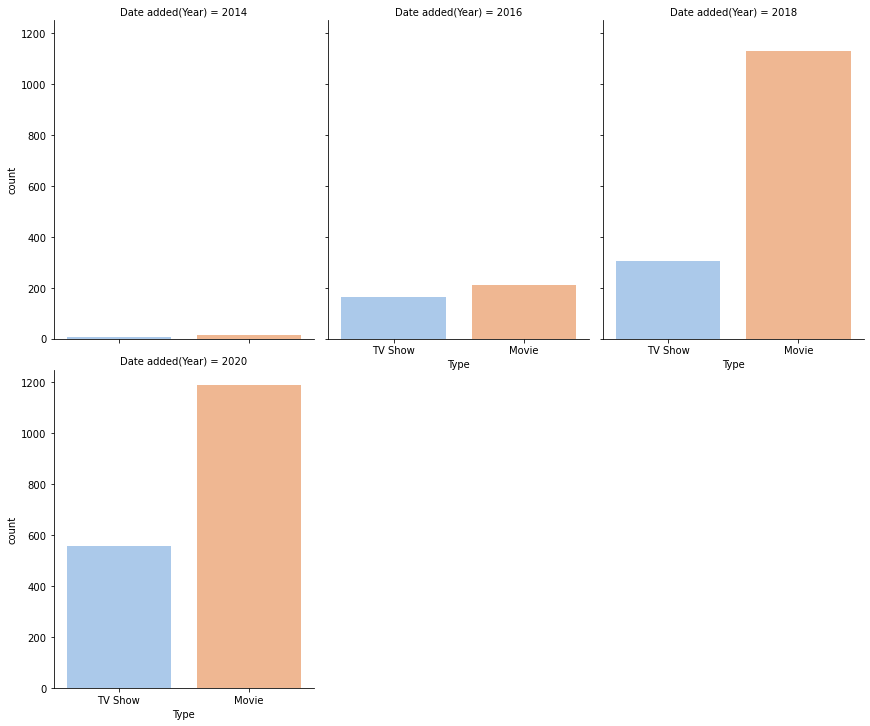

In [144]:
# Count plot of number of movies and number of TV shows in total from 2014 - 2020
sns.catplot(x='Type',
            col='Date added(Year)',
            data=netflixdf[(netflixdf['Date added(Year)'] == 2014) |
                           (netflixdf['Date added(Year)'] == 2016) |
                           (netflixdf['Date added(Year)'] == 2018) |
                           (netflixdf['Date added(Year)'] == 2020)],
            kind='count',
            col_wrap = 3,
            aspect=0.8,
            palette='pastel')

We can see that the number of titles whether TV shows or Movies added onto Netflix each year has increased dramatically over time. Further, we can see that the number of movies added each year has increased dramatically from 2014 through to 2016 but from 2016 onwards it appears that the number of TV shows increases while the number of Movies remains roughly the same.

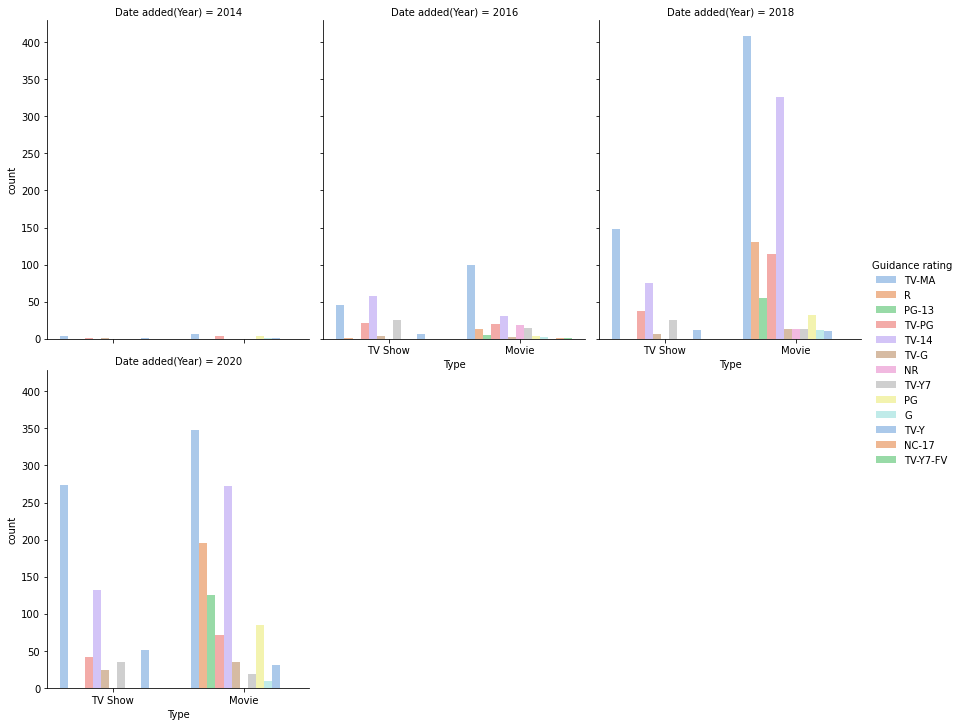

In [143]:
# Count plot of number of movies and number of TV shows in total from 2014 - 2020 filtered by ratings


sns.catplot(x='Type',
            col='Date added(Year)',
            hue='Guidance rating',
            data=netflixdf[(netflixdf['Date added(Year)'] == 2014) |
                           (netflixdf['Date added(Year)'] == 2016) |
                           (netflixdf['Date added(Year)'] == 2018) |
                           (netflixdf['Date added(Year)'] == 2020)],
            kind='count',
            col_wrap = 3,
            aspect=0.8,
            palette='pastel')

This visualization is the same as the one above with one minor change being now we are filtering based on the safety ratings of the show. The rating that stands out the most is TV-MA which is Mature Audience. TV-MA seems to always be in high numbers relative to the total number of titles, however we do see an increase in TV-MA types to TV Shows as the years progress. We also see that the number of TV-14 TV Show's and Movie's have increased dramatically over the years. This suggests that the most popular types of titles on Netflix are of type TV-MA and TV-14, that is, Netflix's audience appears to be more mature or at least, enjoy more mature content.

In [80]:
# Finding year with the most titles added

year_added_series = netflixdf.groupby('Date added(Year)')['Title'].nunique()

In [81]:
year_added_series.sort_values().iloc[[len(year_added_series) -1]]

Date added(Year)
2019    1848
Name: Title, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

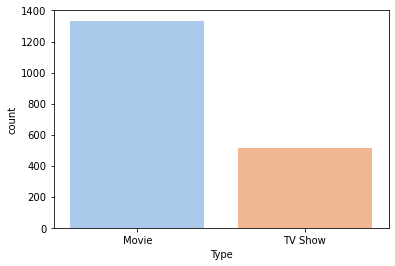

In [145]:
# We can vizualize this and it's separation of Movie and TV Show.

sns.countplot(x='Type', data=netflixdf[netflixdf['Date added(Year)'] == 2019], palette='pastel')

In [114]:
# Creating a vizualization of the countrys with the most titles released

country_dict = {}

for countrys in netflixdf['Country']:
        country_list = countrys.split(", ")
        for country in country_list:
            if country in country_dict:
                country_dict[country] += 1
            else:
                country_dict[country] = 1

In [115]:
countrydf = pd.Series(country_dict).to_frame('Appearances')
countrydf = countrydf.reset_index()
countrydf = countrydf.rename(columns={"index": "Country"})

In [120]:
top5_countrydf = countrydf.sort_values(by='Appearances', ascending=False)[0:5]

<AxesSubplot:xlabel='Country', ylabel='Appearances'>

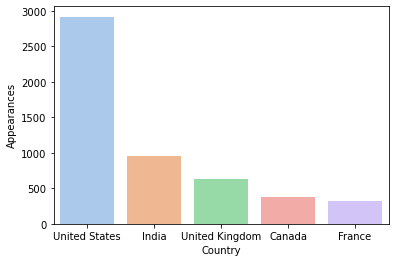

In [146]:
sns.barplot(x='Country', y='Appearances', data=top5_countrydf, palette='pastel')

NameError: name 'netflixdf_top_countriesdf' is not defined

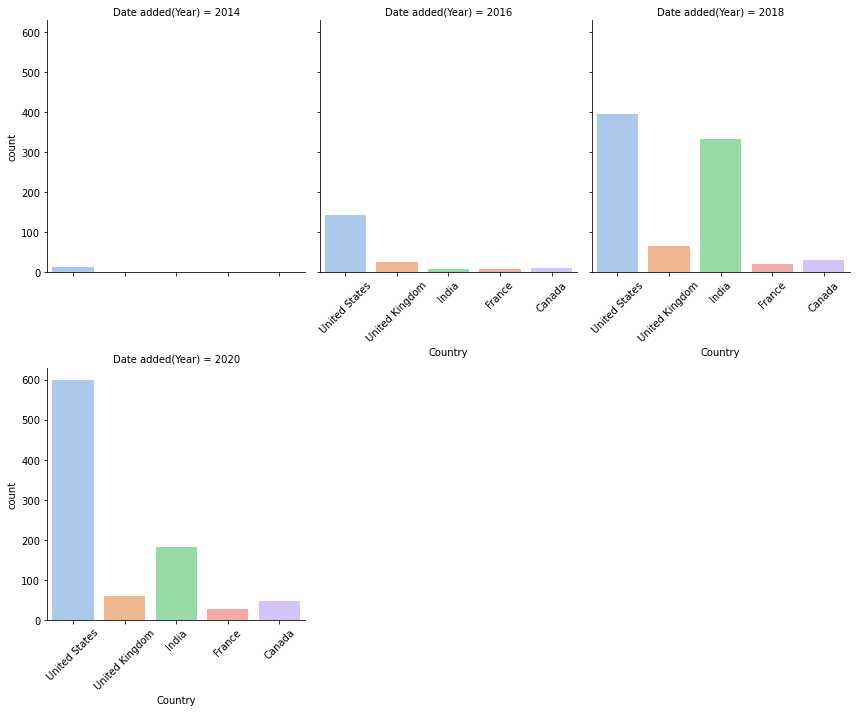

In [208]:
netflix_top_countriesdf = netflixdf[netflixdf['Country'].isin(['United States', 'India', 'United Kingdom', 'Canada', 'France'])]

g = sns.catplot(x='Country',
            col='Date added(Year)',
            data=netflix_top_countriesdf[(netflix_top_countriesdf['Date added(Year)'] == 2014) |
                           (netflix_top_countriesdf['Date added(Year)'] == 2016) |
                           (netflix_top_countriesdf['Date added(Year)'] == 2018) |
                           (netflix_top_countriesdf['Date added(Year)'] == 2020)],
            kind='count',
            col_wrap = 3,
            aspect=0.8,
            palette='pastel')

g.set_xticklabels(rotation=45)
plt.tight_layout()

In [204]:
netflix_top_countriesdf

,Show id,Type,Title,Director,Cast,Country,Date added,release_year,Guidance rating,Duration,Genres,Description,Date added(Year)
3,4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Connell...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
7,8,Movie,187,Kevin Reynolds,"[Samuel L. Jackson, John Heard, Kelly Rowan, C...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019
8,9,Movie,706,Shravan Kumar,"[Divya Dutta, Atul Kulkarni, Mohan Agashe, Anu...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019
9,10,Movie,1920,Vikram Bhatt,"[Rajneesh Duggal, Adah Sharma, Indraneil Sengu...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,7777,Movie,Zokkomon,Satyajit Bhatkal,"[Darsheel Safary, Anupam Kher, Manjari Fadnis,...",India,2018-11-01,2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018
7778,7779,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
7780,7781,Movie,Zoo,Shlok Sharma,"[Shashank Arora, Shweta Tripathi, Rahul Kumar,...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018
7781,7782,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020
